## Evolutionary strategies
### The notebook shows the basic mechanisms of evolutionary strategies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [4]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [5]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [6]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(4, 4))
    fig= plt.figure()
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [7]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(4, 4))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

<Figure size 400x400 with 0 Axes>

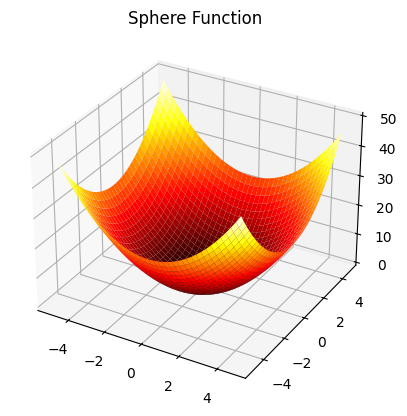

In [8]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

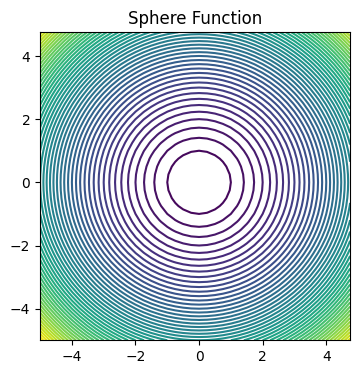

In [9]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')


<Figure size 400x400 with 0 Axes>

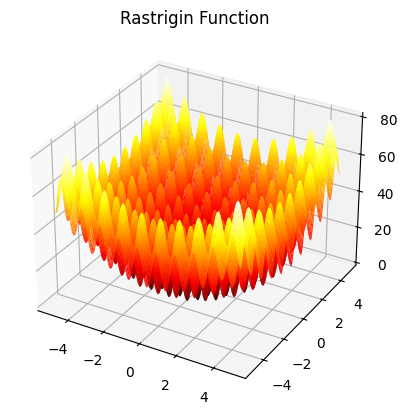

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')


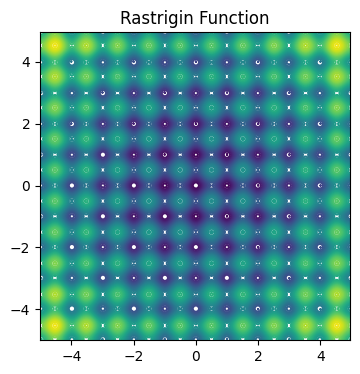

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')


<Figure size 400x400 with 0 Axes>

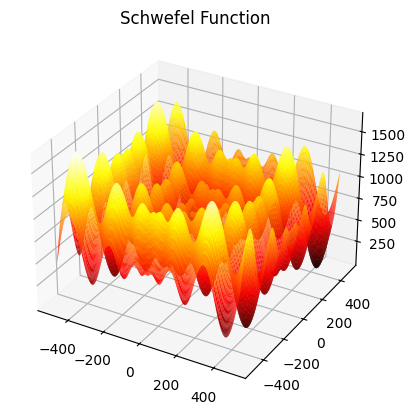

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')


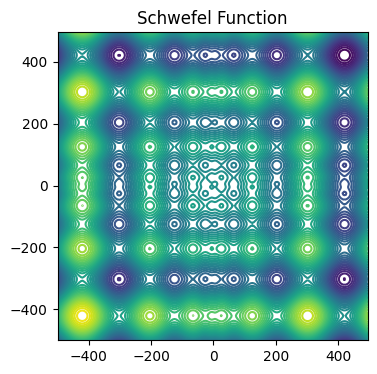

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')


<Figure size 400x400 with 0 Axes>

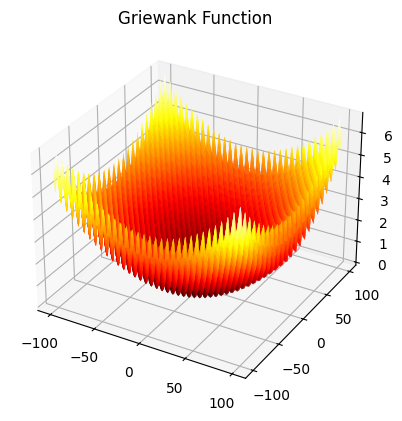

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')


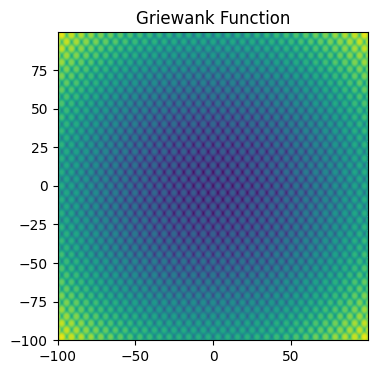

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')


### Examples of mutation patterns

In [16]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### $x_i=x_i+\varepsilon_i$ where $\varepsilon_i$ has a normal distribution $\mathcal{N}(0,\sigma^2)$ while $\sigma$ is fixed for all $i=1,2,...,d$

In [17]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

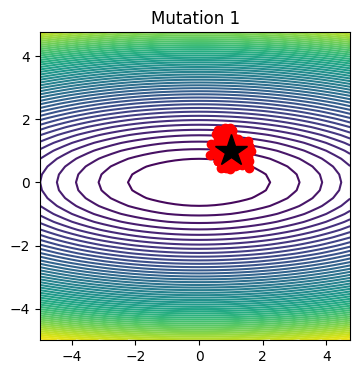

In [18]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(4, 4))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

## example 2

### $x_i=x_i+\varepsilon_i$ where $\varepsilon_i$ has a normal distribution $\mathcal{N}(0,\sigma _1^2)$ while $\sigma _1$ can be different for all $i=1,2,...,d$

In [19]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

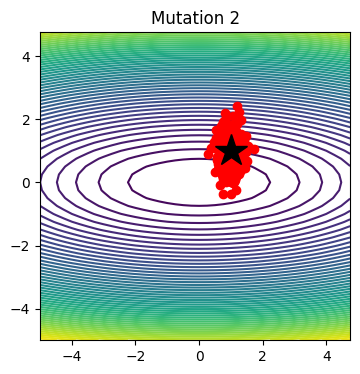

In [20]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(4, 4))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

## example 3
### $x = x + \varepsilon$ while $\varepsilon$ has a multidimentional normal distribution $\mathcal{N}(0,\sum)$

In [21]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

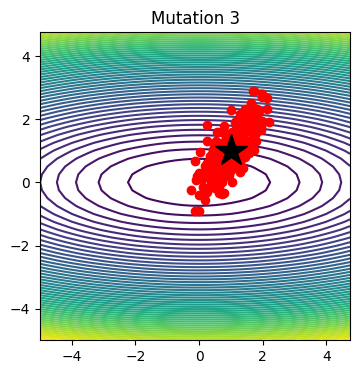

In [22]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(4, 4))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Example of an evolutionary strategy

In [23]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1):
    
    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

In [24]:
def plot_es(d, N, T, objective_function, log_every=10, sigma=50.0):
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function, d, N, T, 2*N, 2, sigma, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), log_every)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0])
    plt.plot(history_objective_values[:, 1])
    plt.plot(history_objective_values[:, 2])
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title(f'd={d},N={N},T={T} -- min/avg/max objective function values -- {objective_function.__name__}')
    plt.legend(['Min','Mean', 'Max'], loc='upper right')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas)
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title(f'best sigmas')
    plt.show()

### Performance of the evolutionary strategy for the spherical function F1

Iteration 0000 : best score = -3641.47884169, mean score = -26482.58007147.
Iteration 0010 : best score = -30.19224132, mean score = -192.78280838.
Iteration 0020 : best score = -0.08764159, mean score = -0.47934242.
Iteration 0030 : best score = -0.00021760, mean score = -0.00122715.
Iteration 0040 : best score = -0.00000026, mean score = -0.00000265.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


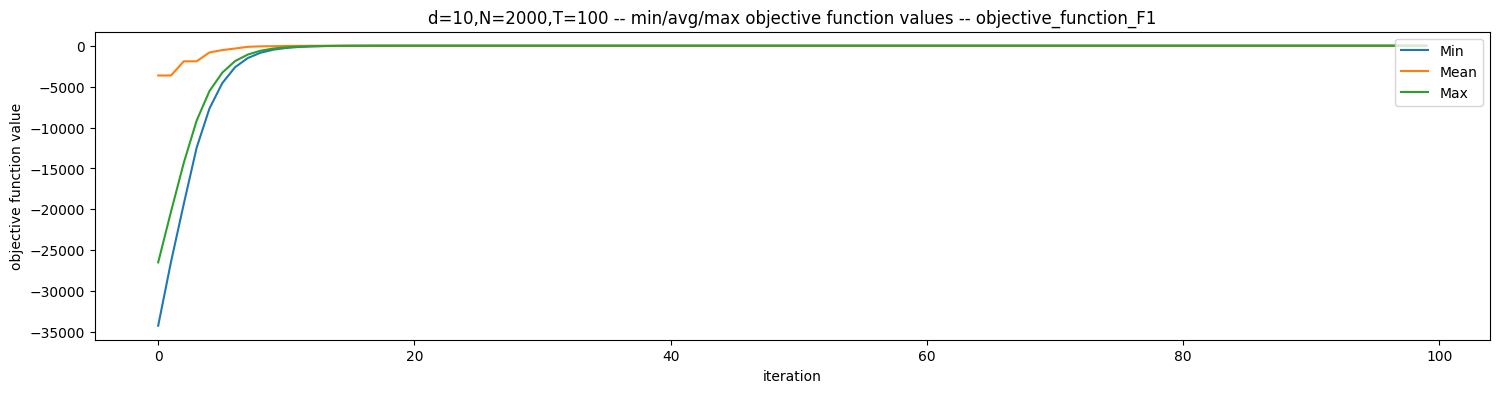

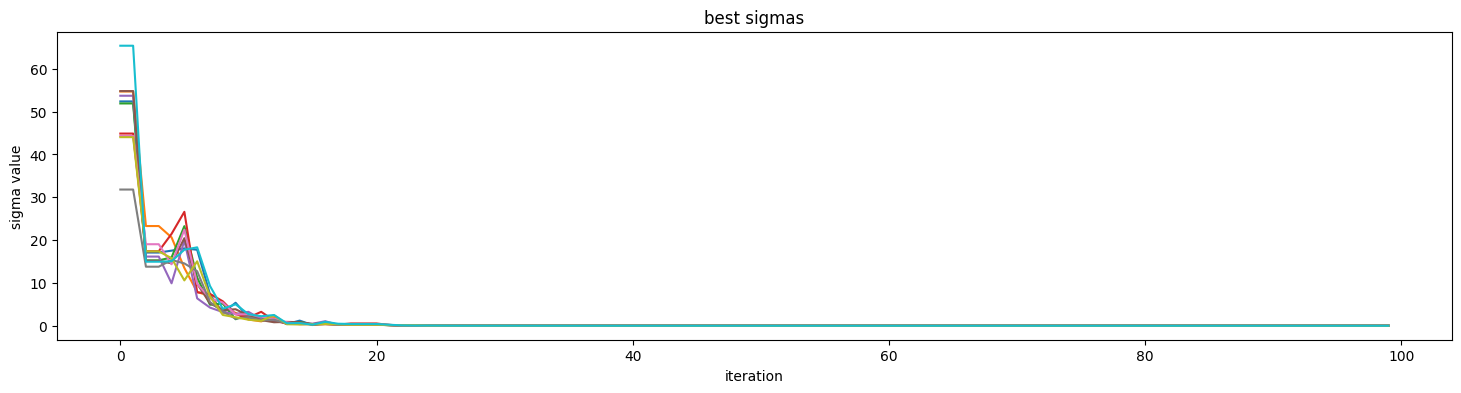

In [25]:
plot_es(d=10,N=2000, T=100, objective_function=objective_function_F1)

### Operation of the evolutionary strategy for the Rastrigin F6 function

Iteration 0000 : best score = -6378.75208747, mean score = -26634.01907797.
Iteration 0010 : best score = -117.11051154, mean score = -335.53596233.
Iteration 0020 : best score = -33.31658720, mean score = -76.36259367.
Iteration 0030 : best score = -25.50451868, mean score = -62.02565149.
Iteration 0040 : best score = -25.50451868, mean score = -55.63118337.
Iteration 0050 : best score = -22.74261225, mean score = -51.40295949.
Iteration 0060 : best score = -11.23848919, mean score = -43.49934300.
Iteration 0070 : best score = -0.07858393, mean score = -0.55993958.
Iteration 0080 : best score = -0.00020474, mean score = -0.00114971.
Iteration 0090 : best score = -0.00000033, mean score = -0.00000197.


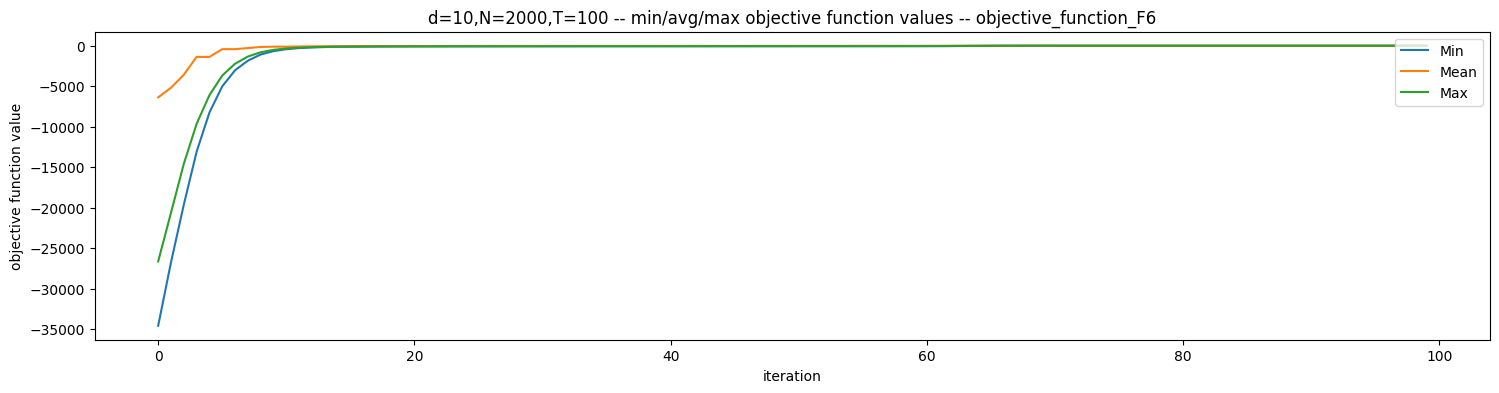

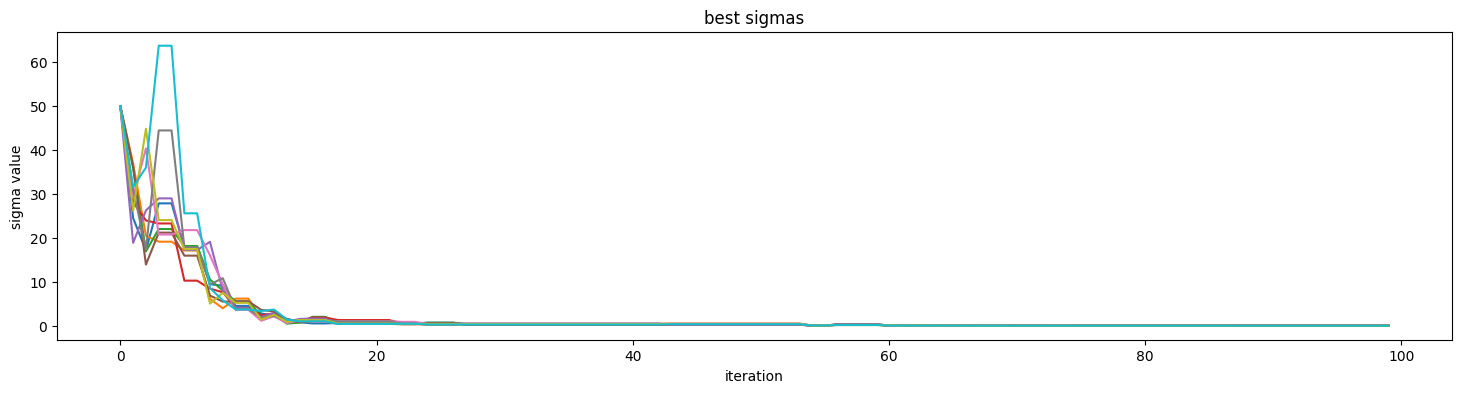

In [26]:
plot_es(d=10,N=2000, T=100, objective_function=objective_function_F6)

### Operation of the evolutionary strategy for the Griewank F8 function

Iteration 0000 : best score = -2.18140357, mean score = -7.68430307.
Iteration 0010 : best score = -0.63006623, mean score = -1.04812995.
Iteration 0020 : best score = -0.03710046, mean score = -0.26434895.
Iteration 0030 : best score = -0.00014181, mean score = -0.00078693.
Iteration 0040 : best score = -0.00000035, mean score = -0.00000218.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


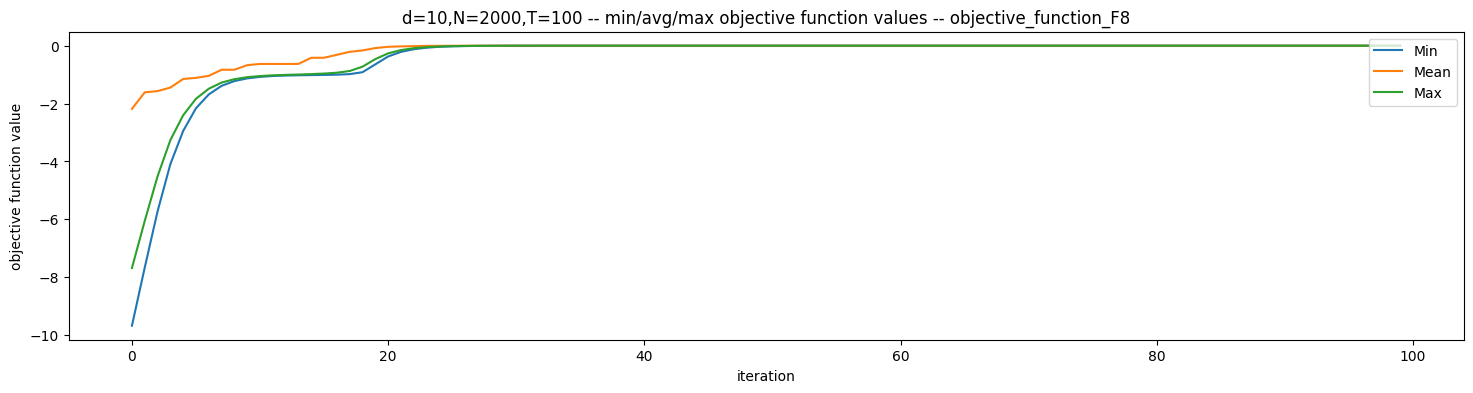

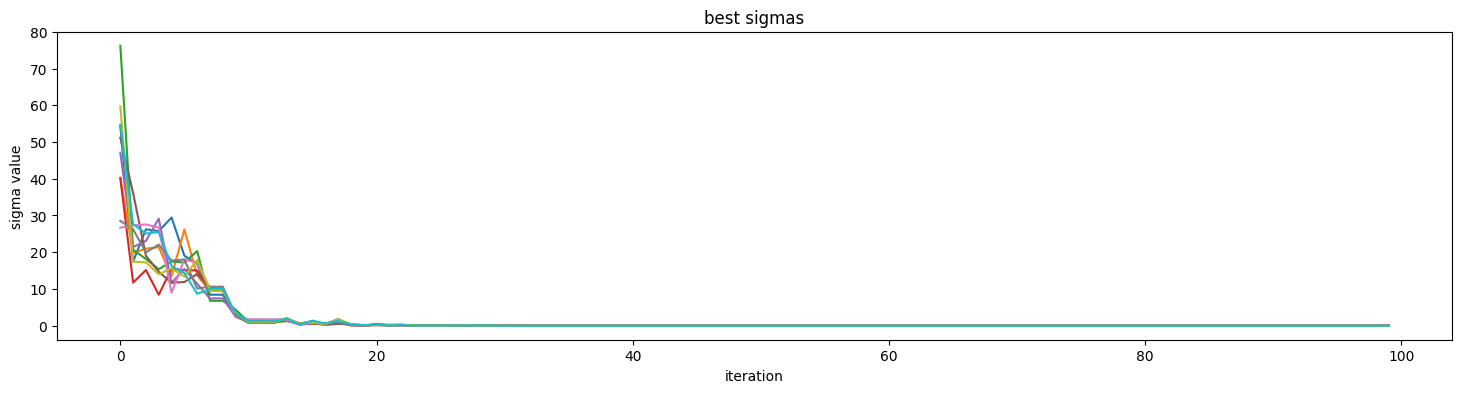

In [27]:
plot_es(d=10,N=2000, T=100, objective_function=objective_function_F8)

# Task 1


#### (a) Read the IPython notebook showing the basic mechanisms of strategy evolutionary strategies provided in the lecture materials.  
#### b) Check the operation of the evolution strategy implemented in the notebook for the functions spherical, Rastrigin, Schwefel and Griewank functions with dimensionality d = 10, 20, 50, 100. Check the effect of the parameters of the algorithm on its performance.

Iteration 0000 : best score = -2198.86263096, mean score = -26201.89455374.
Iteration 0020 : best score = -0.08831266, mean score = -0.53856424.
Iteration 0040 : best score = -0.00000027, mean score = -0.00000194.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.


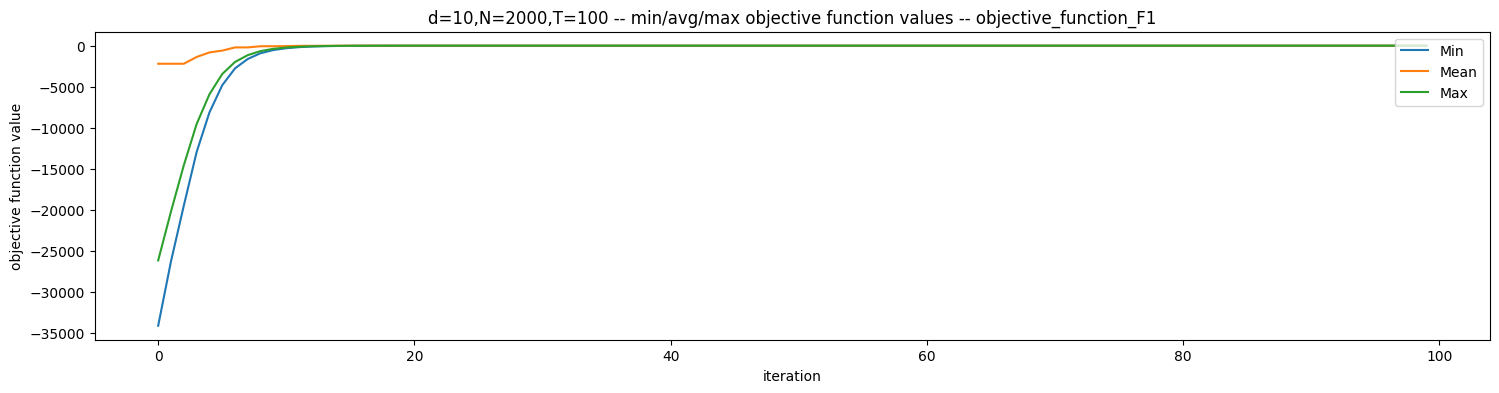

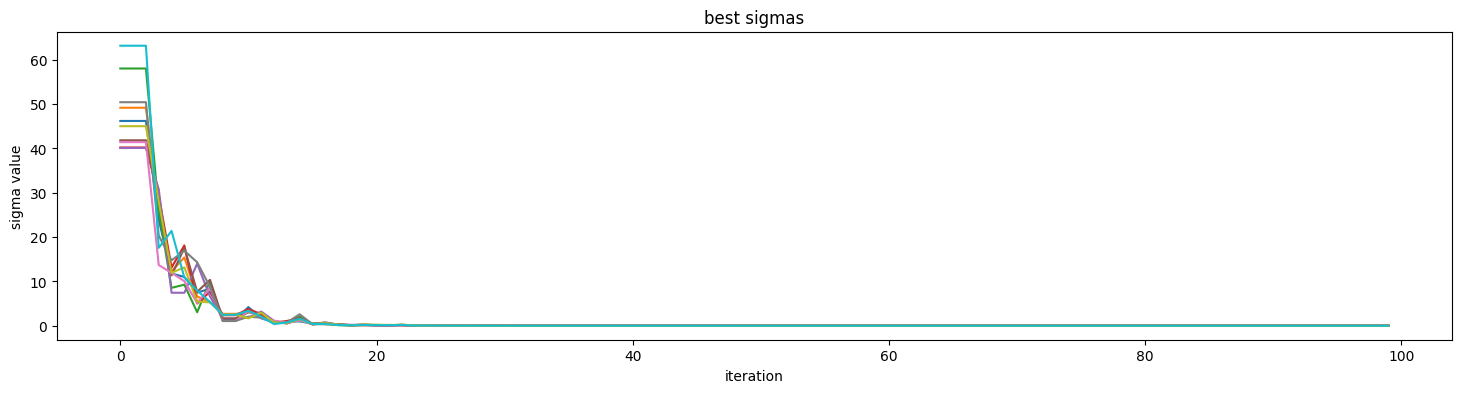

Iteration 0000 : best score = -21019.75007541, mean score = -59197.72408245.
Iteration 0020 : best score = -20.09985537, mean score = -47.20249140.
Iteration 0040 : best score = -0.01205187, mean score = -0.03001622.
Iteration 0060 : best score = -0.00000875, mean score = -0.00002132.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000001.


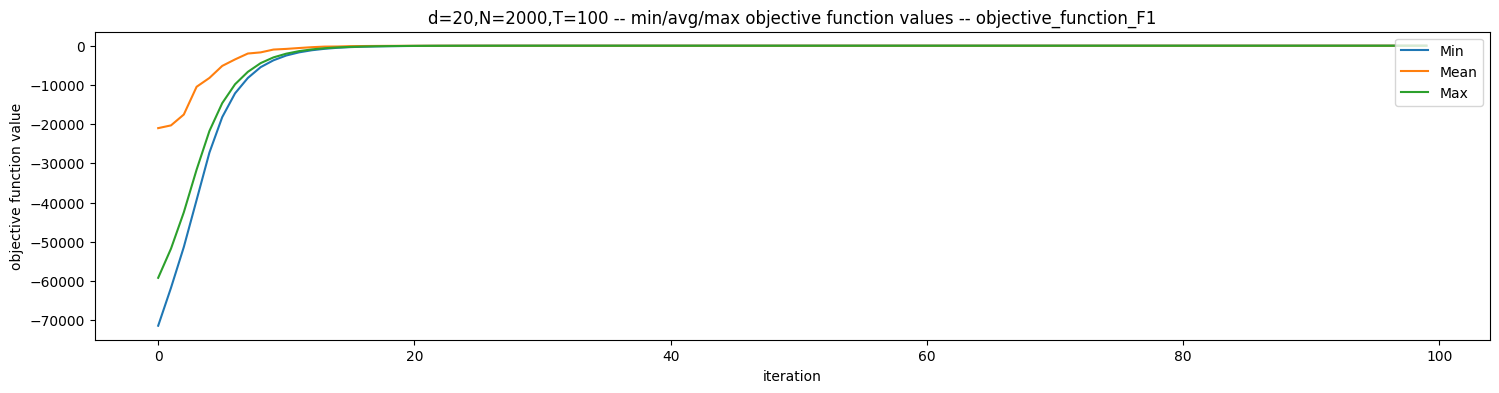

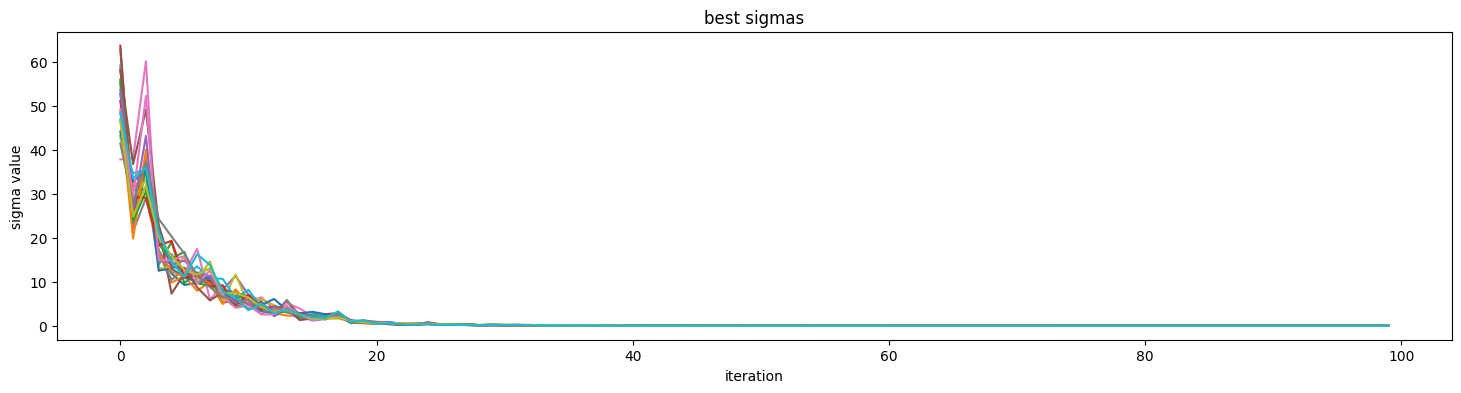

Iteration 0000 : best score = -106327.50321513, mean score = -160805.31979239.
Iteration 0020 : best score = -3829.57401549, mean score = -5344.30468025.
Iteration 0040 : best score = -181.70897651, mean score = -266.29486211.
Iteration 0060 : best score = -10.84228035, mean score = -15.27879402.
Iteration 0080 : best score = -0.58470634, mean score = -0.83998777.


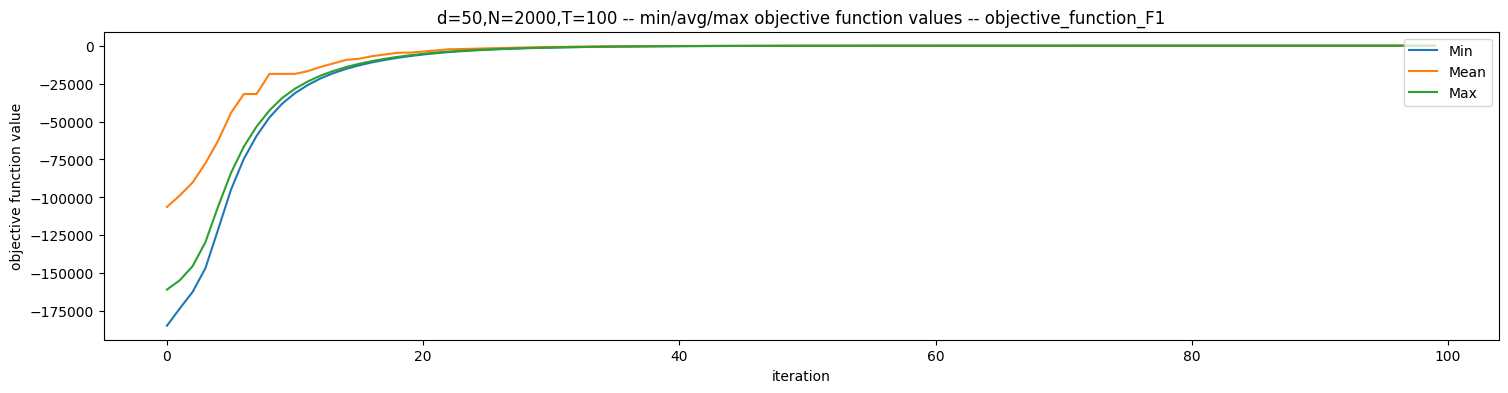

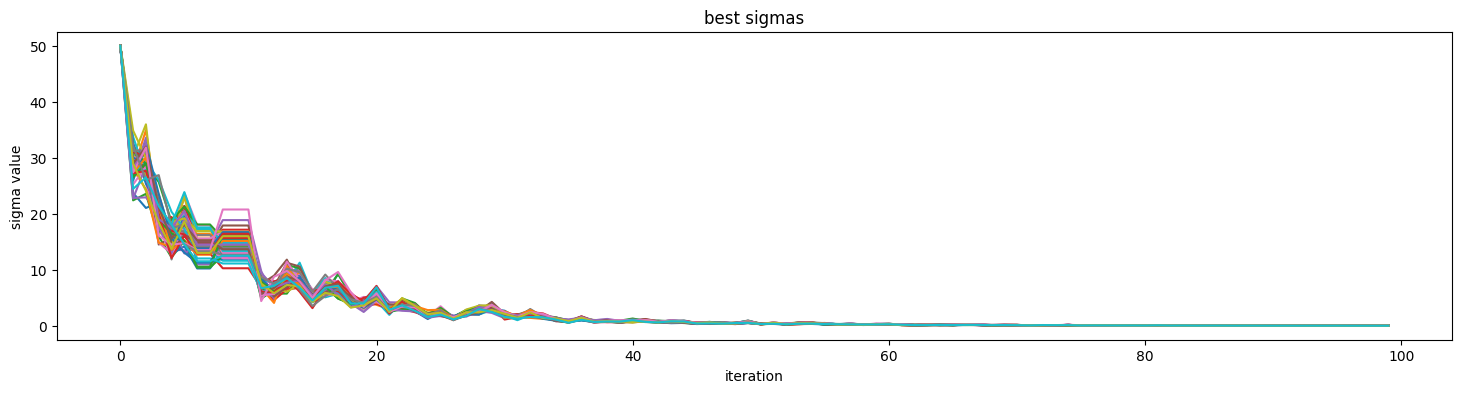

Iteration 0000 : best score = -232005.24474867, mean score = -329214.27077625.
Iteration 0020 : best score = -41055.32875126, mean score = -47894.82419513.
Iteration 0040 : best score = -8592.41480654, mean score = -9962.35887889.
Iteration 0060 : best score = -1861.10445747, mean score = -2187.79159685.
Iteration 0080 : best score = -433.80355276, mean score = -503.85913038.


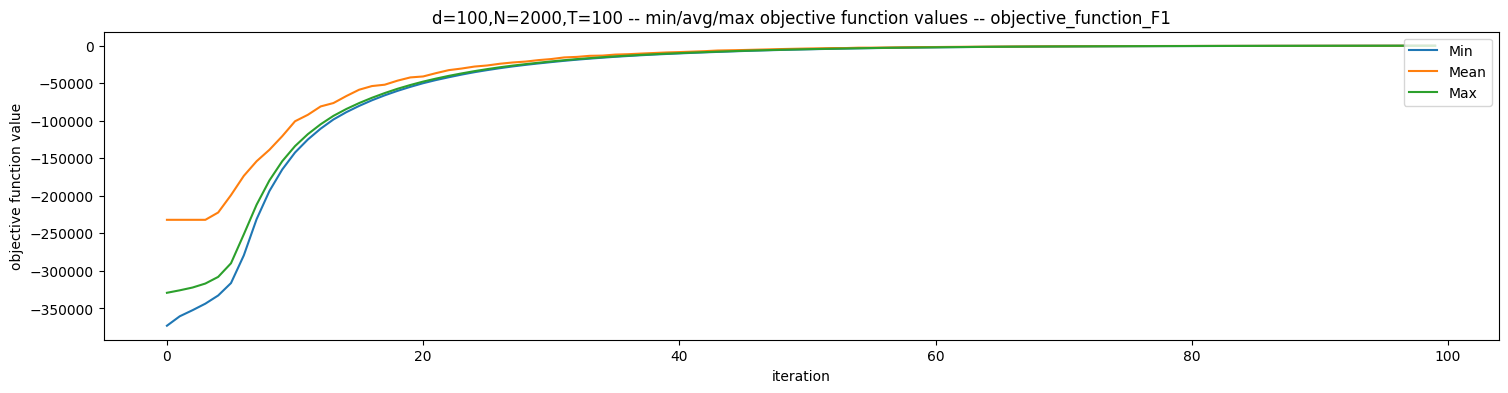

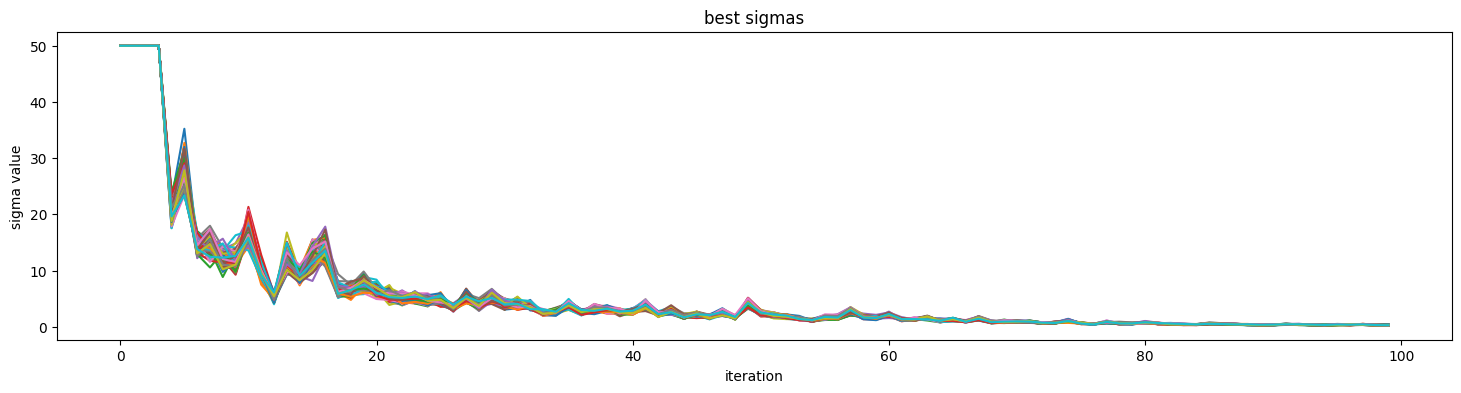

In [28]:
# Sphere function
plot_es(d=10,N=2000, T=100, log_every=20, objective_function=objective_function_F1)
plot_es(d=20,N=2000, T=100, log_every=20 ,objective_function=objective_function_F1)
plot_es(d=50,N=2000, T=100, log_every=20 ,objective_function=objective_function_F1)
plot_es(d=100,N=2000, T=100, log_every=20 ,objective_function=objective_function_F1)

Iteration 0000 : best score = -7278.75177359, mean score = -26728.78866185.
Iteration 0020 : best score = -31.31368574, mean score = -75.84468583.
Iteration 0040 : best score = -17.08323551, mean score = -55.33144081.
Iteration 0060 : best score = -0.00327820, mean score = -0.01664911.
Iteration 0080 : best score = -0.00000001, mean score = -0.00000007.


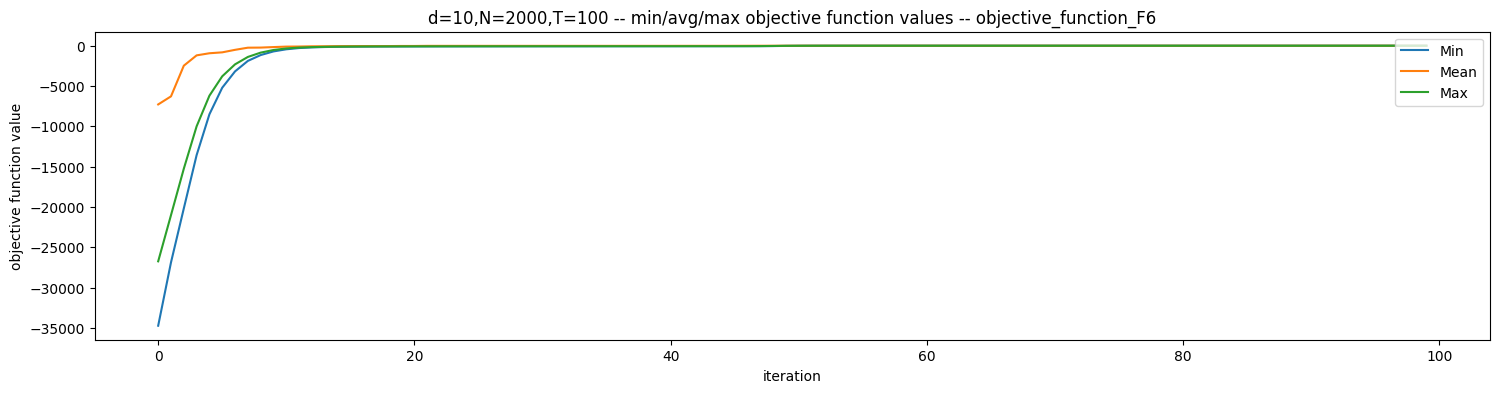

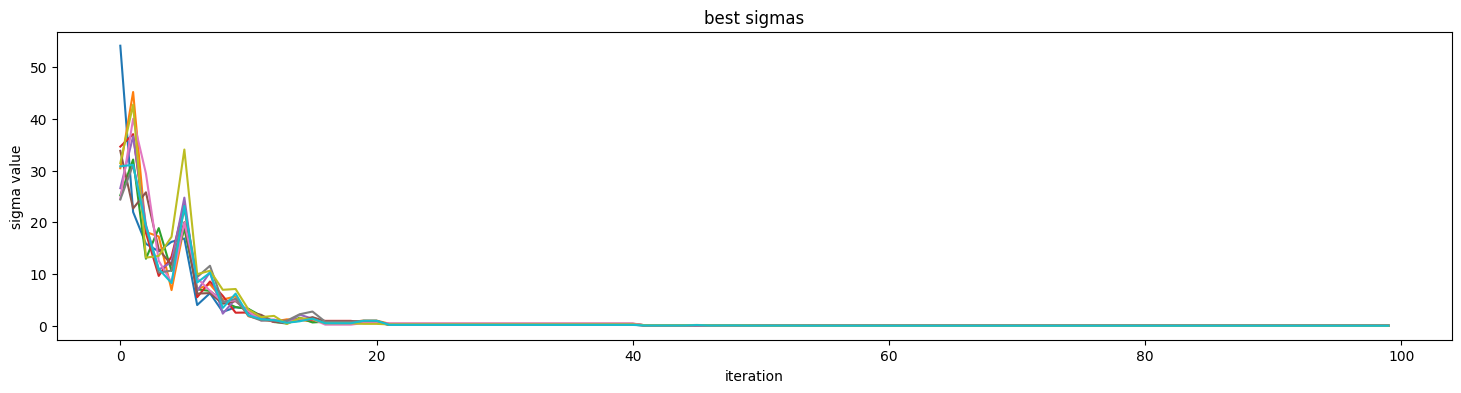

Iteration 0000 : best score = -26293.78337204, mean score = -59505.92296305.
Iteration 0020 : best score = -152.82746375, mean score = -257.34152370.
Iteration 0040 : best score = -91.49374343, mean score = -156.75313799.
Iteration 0060 : best score = -91.49374343, mean score = -141.88201373.
Iteration 0080 : best score = -70.10366861, mean score = -128.05109146.


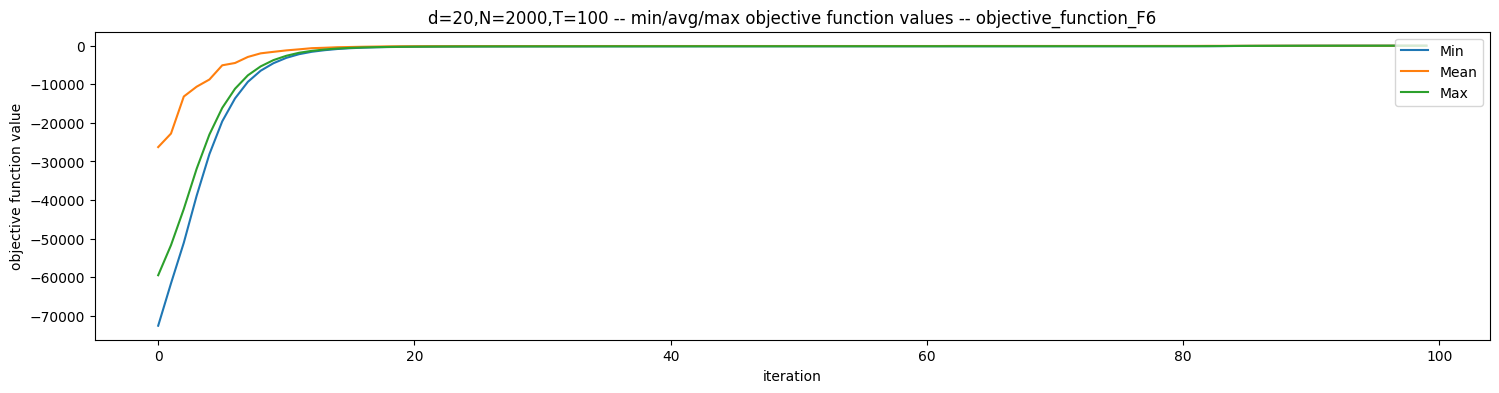

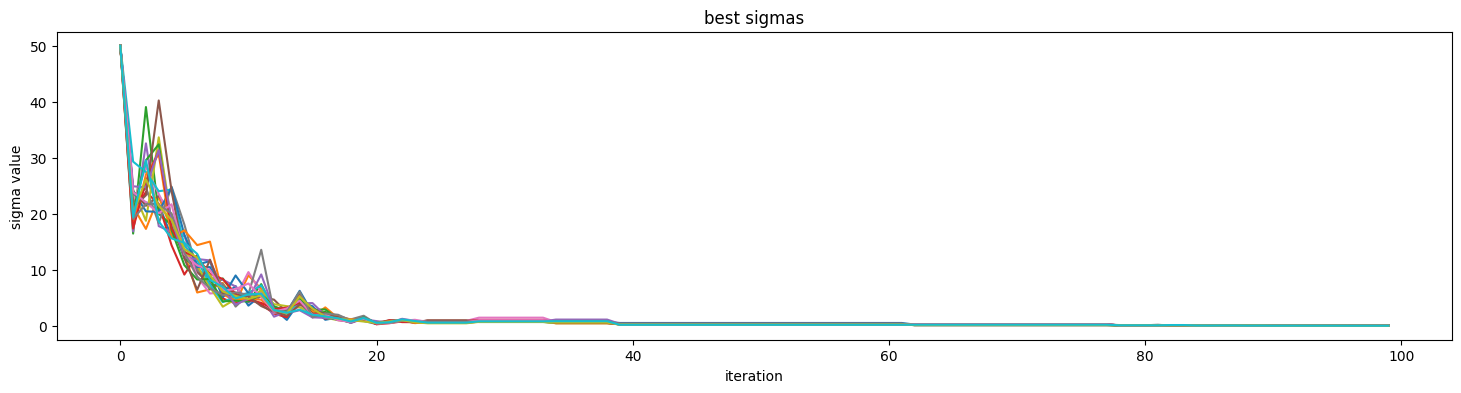

Iteration 0000 : best score = -91526.59353133, mean score = -161882.78033920.
Iteration 0020 : best score = -3711.10940355, mean score = -5156.61410419.
Iteration 0040 : best score = -642.02056761, mean score = -766.97779819.
Iteration 0060 : best score = -436.52921476, mean score = -546.30837843.
Iteration 0080 : best score = -325.13934982, mean score = -439.84996732.


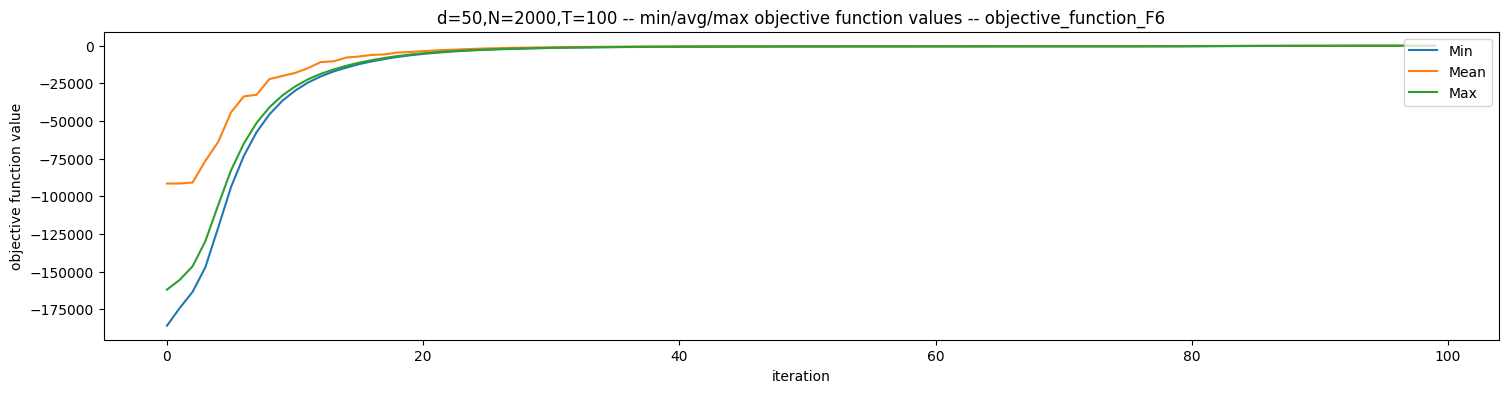

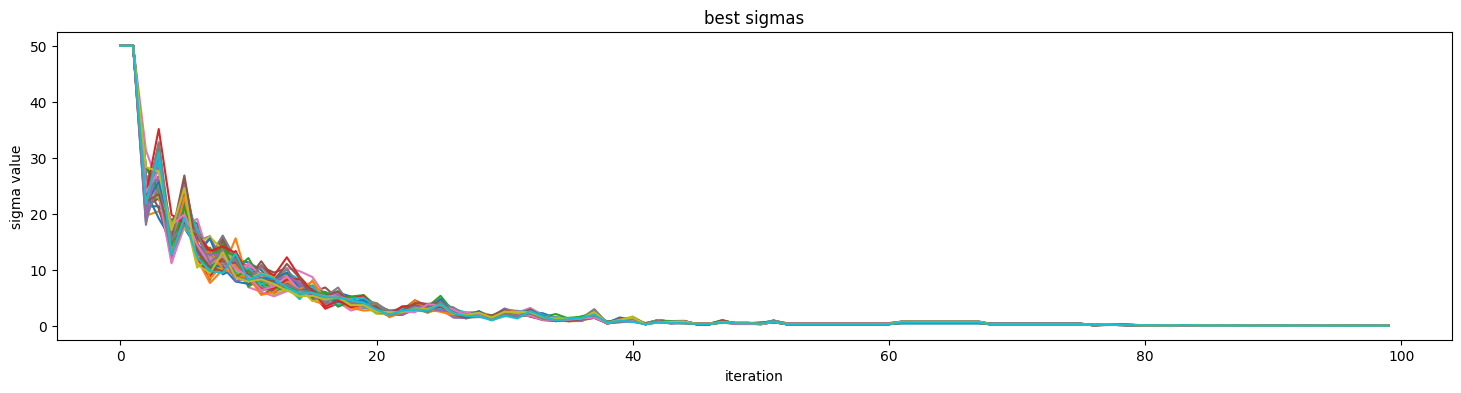

Iteration 0000 : best score = -242842.81896524, mean score = -331726.90874885.
Iteration 0020 : best score = -41612.73427455, mean score = -47817.89537092.
Iteration 0040 : best score = -10068.02209242, mean score = -11572.11737794.
Iteration 0060 : best score = -3163.81992977, mean score = -3524.75356836.
Iteration 0080 : best score = -1595.37694696, mean score = -1849.83772306.


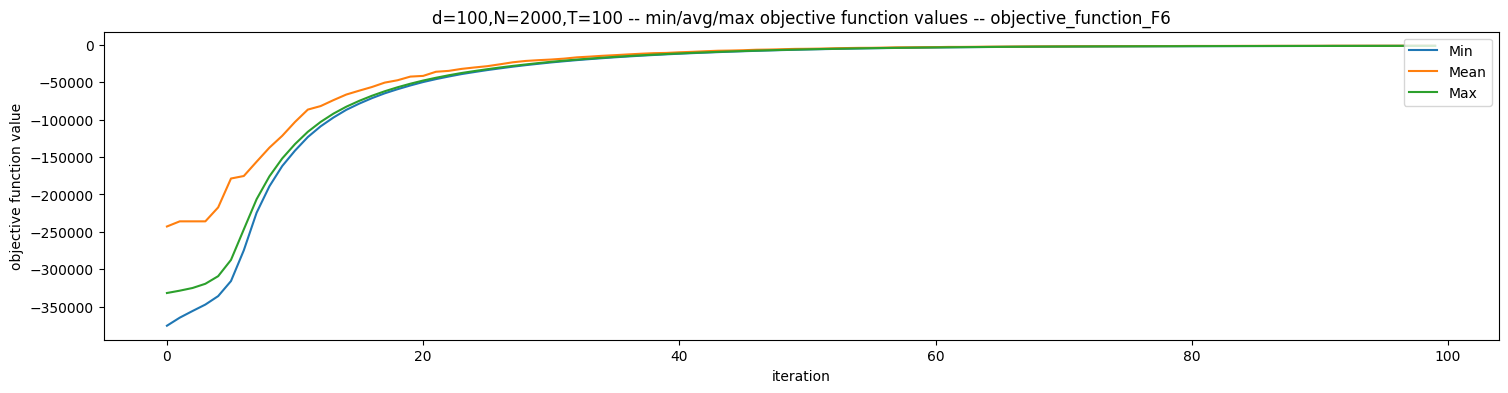

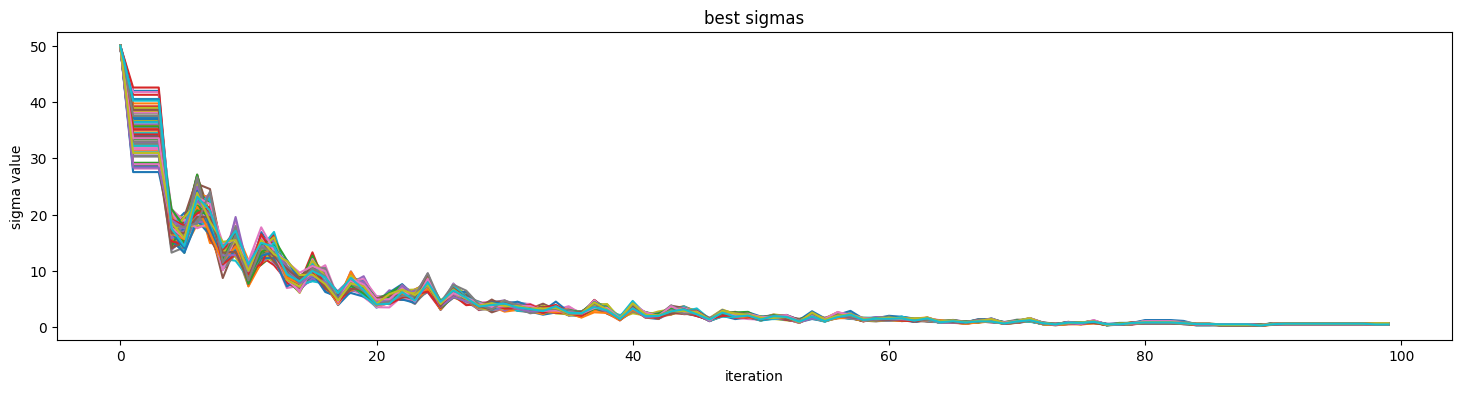

In [29]:
# Rastrigin function
plot_es(d=10,N=2000, T=100, log_every=20, objective_function=objective_function_F6)
plot_es(d=20,N=2000, T=100, log_every=20 ,objective_function=objective_function_F6)
plot_es(d=50,N=2000, T=100, log_every=20 ,objective_function=objective_function_F6)
plot_es(d=100,N=2000, T=100, log_every=20 ,objective_function=objective_function_F6)

Iteration 0000 : best score = -3652.08190563, mean score = -3885.88474828.
Iteration 0020 : best score = -3553.47964640, mean score = -3553.48182040.
Iteration 0040 : best score = -3553.47918049, mean score = -3553.47918049.
Iteration 0060 : best score = -3553.47918048, mean score = -3553.47918048.
Iteration 0080 : best score = -3553.47918048, mean score = -3553.47918048.


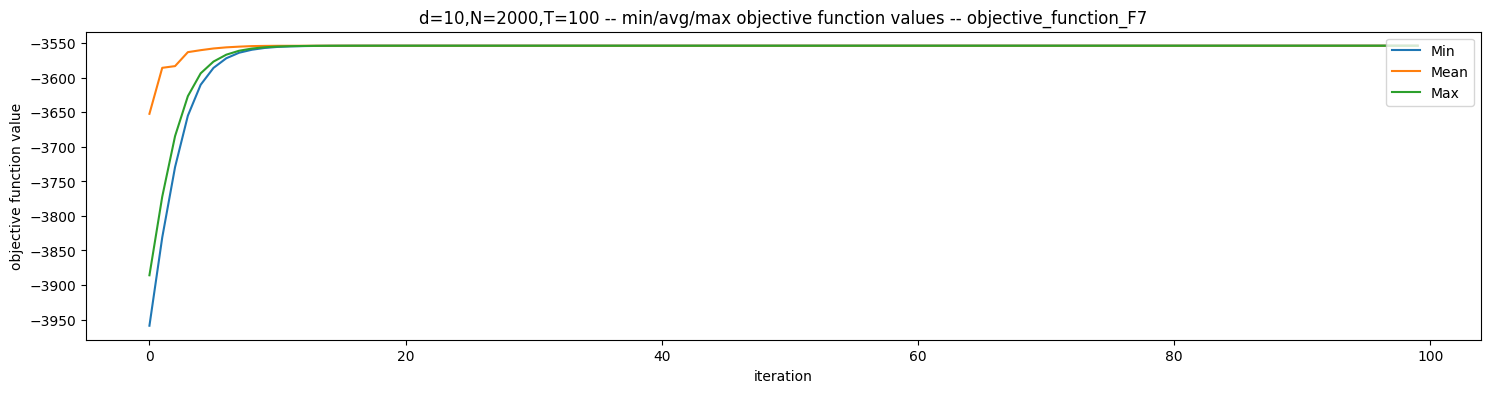

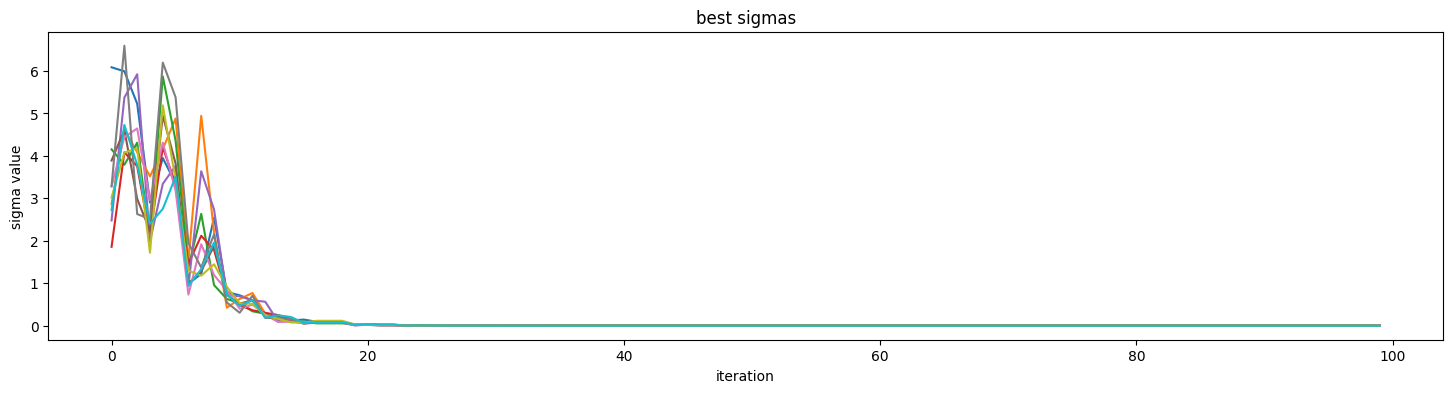

Iteration 0000 : best score = -7513.92511010, mean score = -7843.73426091.
Iteration 0020 : best score = -7107.13418891, mean score = -7107.41966554.
Iteration 0040 : best score = -7106.95848105, mean score = -7106.95867288.
Iteration 0060 : best score = -7106.95836105, mean score = -7106.95836118.
Iteration 0080 : best score = -7106.95836097, mean score = -7106.95836097.


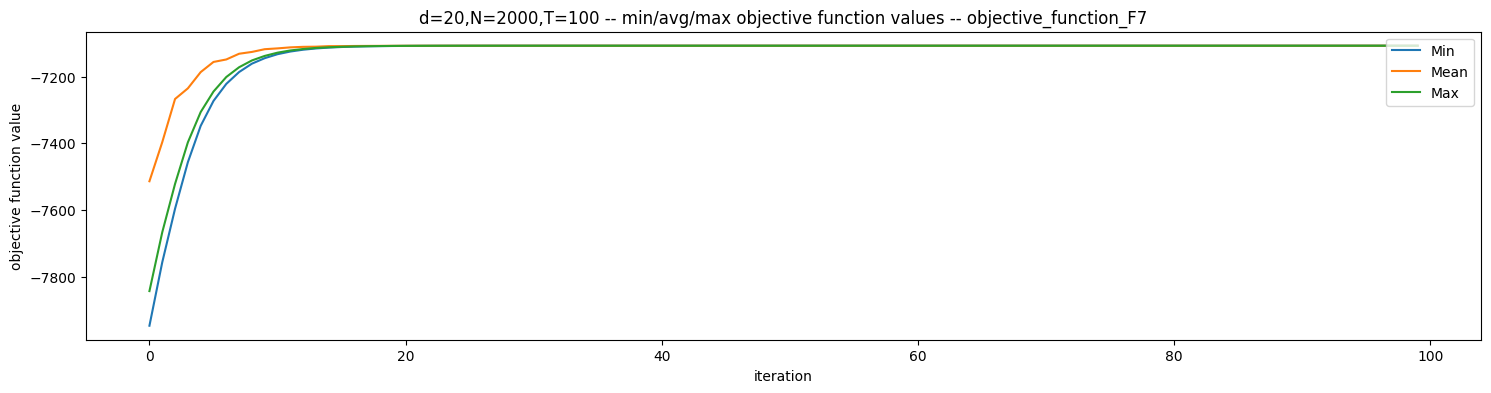

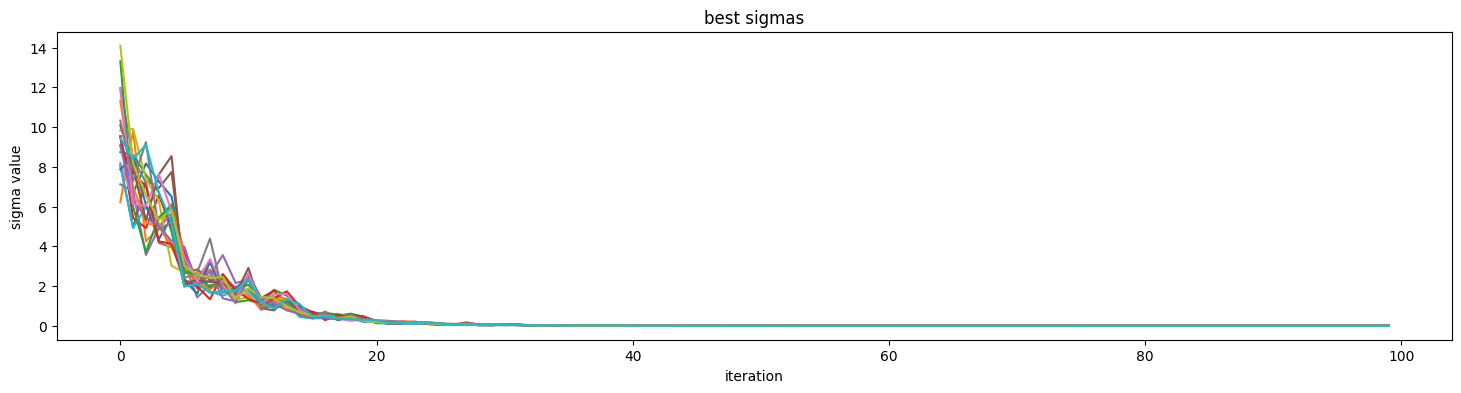

Iteration 0000 : best score = -19076.14390311, mean score = -19736.12115770.
Iteration 0020 : best score = -17794.20606665, mean score = -17808.40523168.
Iteration 0040 : best score = -17768.55295525, mean score = -17769.27381924.
Iteration 0060 : best score = -17767.46934640, mean score = -17767.50223865.
Iteration 0080 : best score = -17767.40054567, mean score = -17767.40228867.


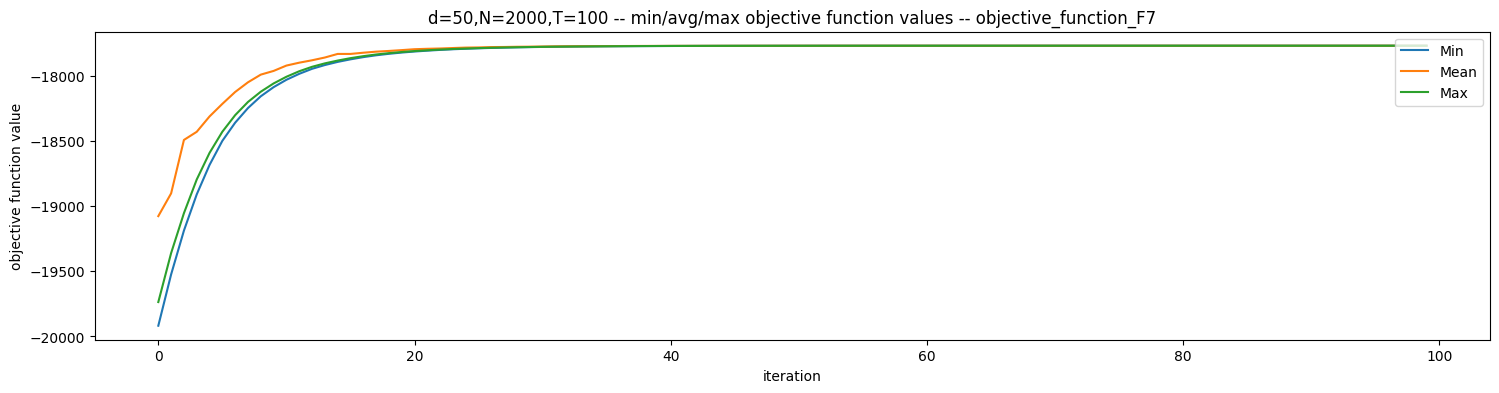

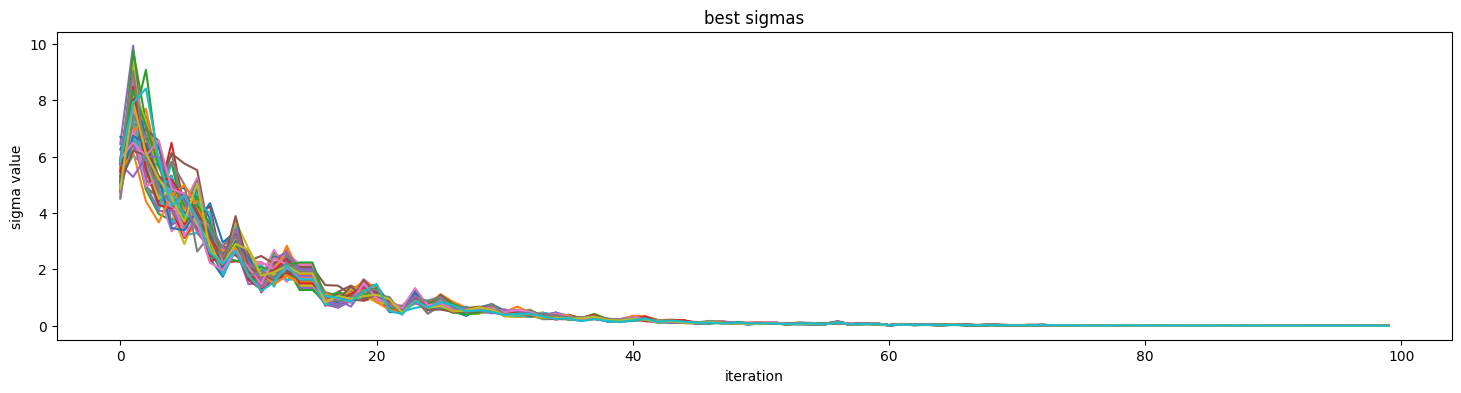

Iteration 0000 : best score = -38520.28271978, mean score = -39609.76171240.
Iteration 0020 : best score = -35866.31815007, mean score = -35917.72101422.
Iteration 0040 : best score = -35607.75389585, mean score = -35617.77721190.
Iteration 0060 : best score = -35551.00879936, mean score = -35553.59207349.
Iteration 0080 : best score = -35538.70631838, mean score = -35539.38190492.


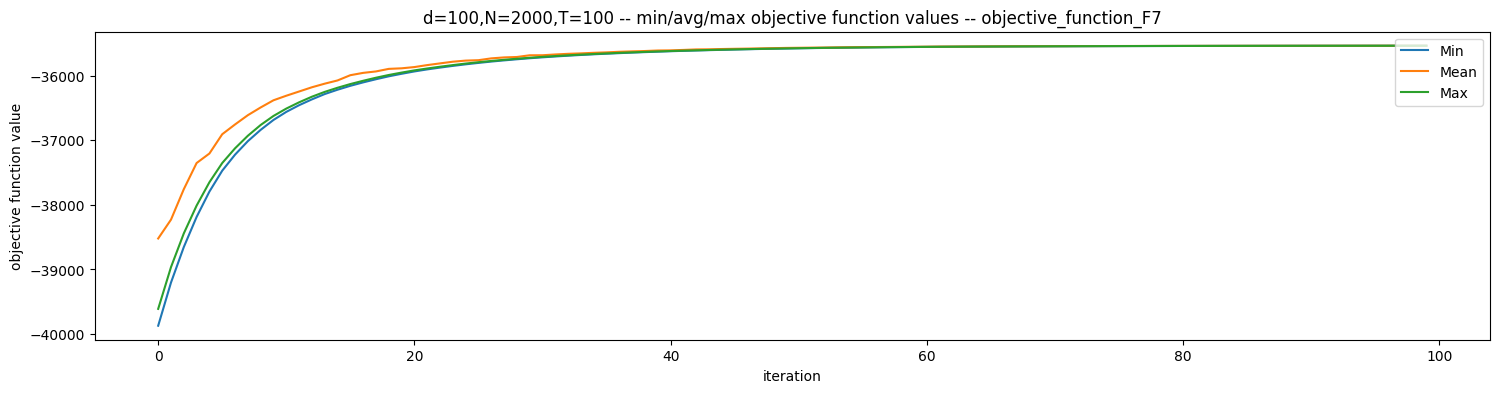

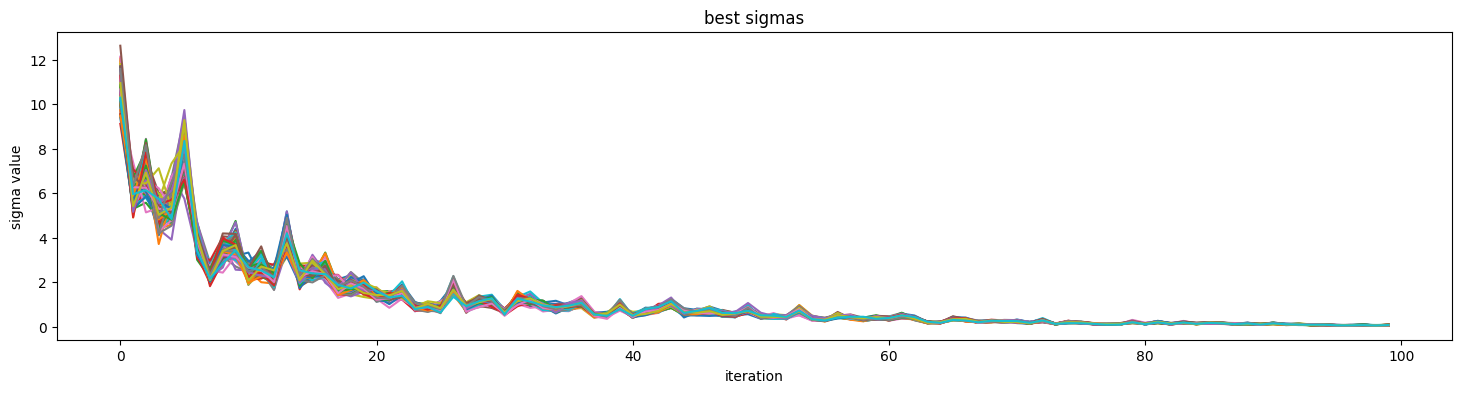

In [30]:
# Schwefel function
plot_es(d=10,N=2000, T=100, log_every=20, objective_function=objective_function_F7,sigma=10)
plot_es(d=20,N=2000, T=100, log_every=20 ,objective_function=objective_function_F7,sigma=10)
plot_es(d=50,N=2000, T=100, log_every=20 ,objective_function=objective_function_F7,sigma=10)
plot_es(d=100,N=2000, T=100, log_every=20 ,objective_function=objective_function_F7,sigma=10)

Iteration 0000 : best score = -2.82936966, mean score = -7.72364391.
Iteration 0020 : best score = -0.02368828, mean score = -0.17409012.
Iteration 0040 : best score = -0.00000086, mean score = -0.00000408.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.


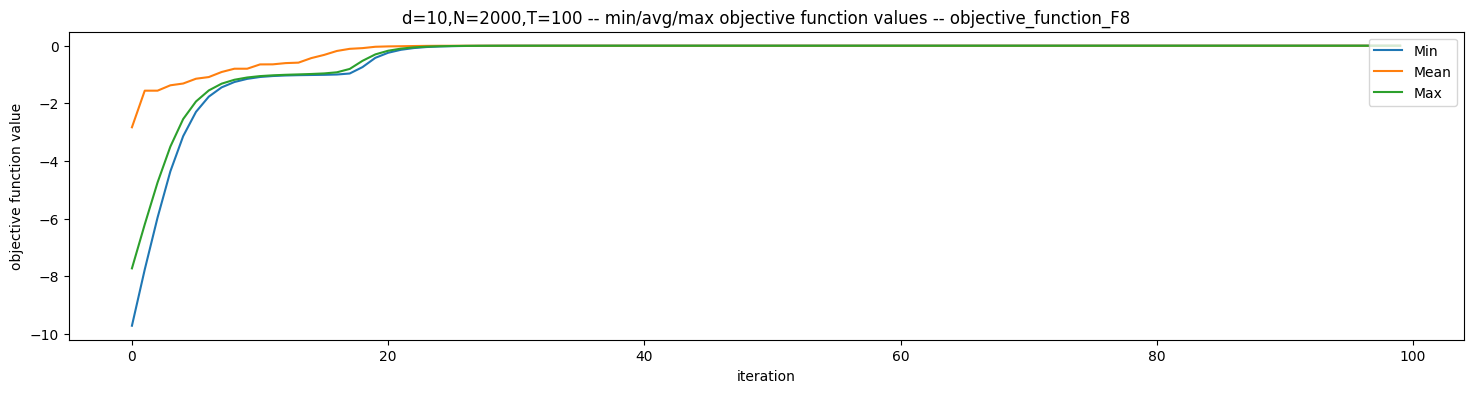

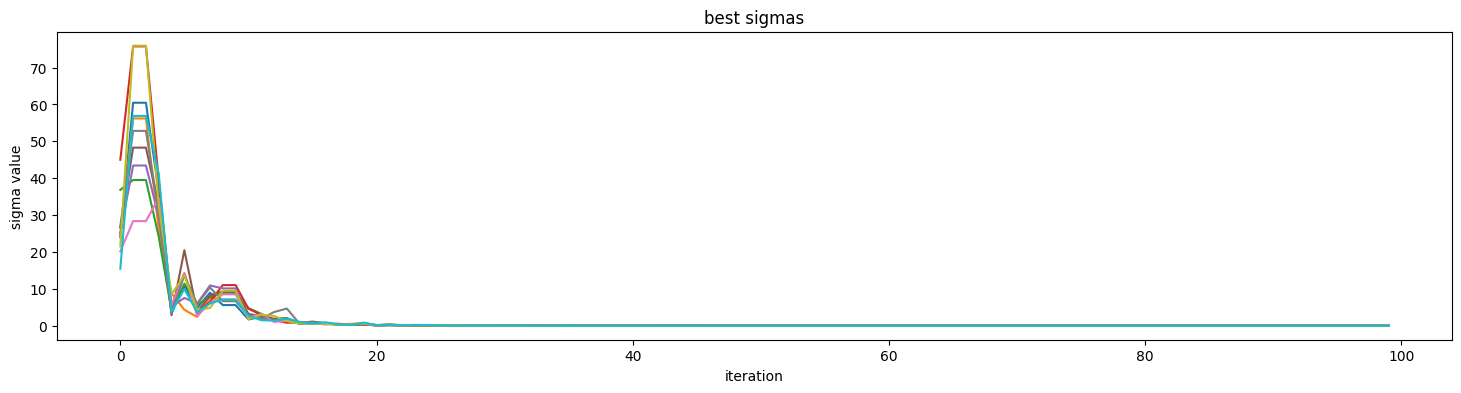

Iteration 0000 : best score = -8.53848573, mean score = -15.92511199.
Iteration 0020 : best score = -0.69354692, mean score = -0.99041581.
Iteration 0040 : best score = -0.01155822, mean score = -0.01848597.
Iteration 0060 : best score = -0.00017666, mean score = -0.00037894.
Iteration 0080 : best score = -0.00000102, mean score = -0.00000227.


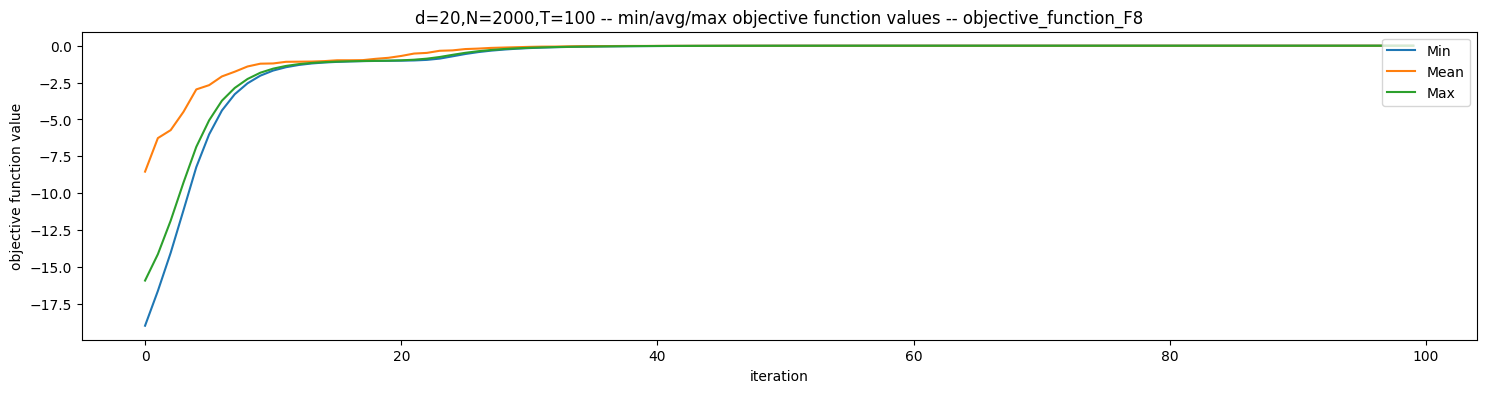

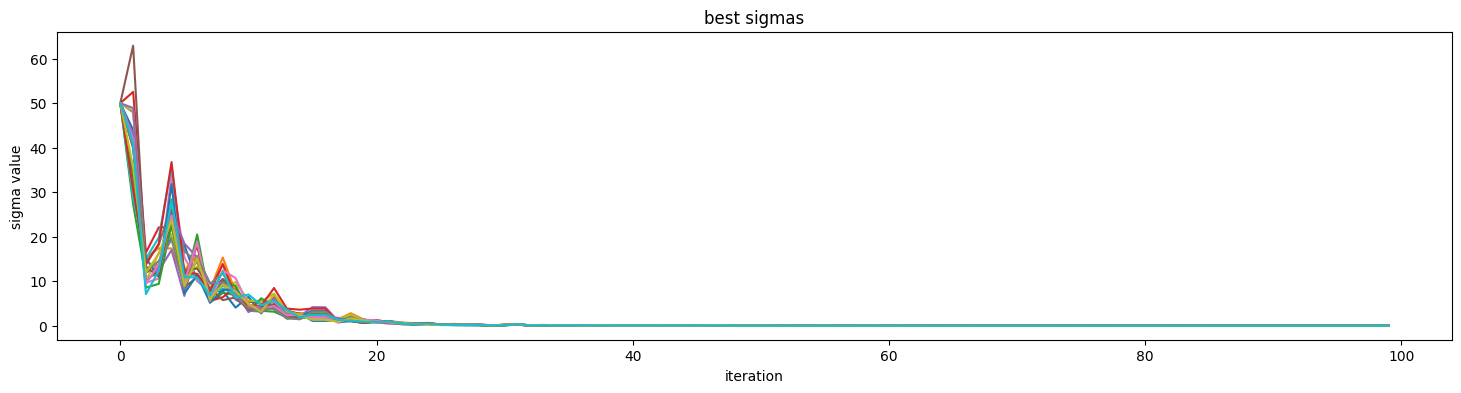

Iteration 0000 : best score = -26.90693466, mean score = -41.20554584.
Iteration 0020 : best score = -2.11878354, mean score = -2.46510418.
Iteration 0040 : best score = -1.05207545, mean score = -1.07249241.
Iteration 0060 : best score = -0.35625948, mean score = -0.44877589.
Iteration 0080 : best score = -0.10249362, mean score = -0.11965677.


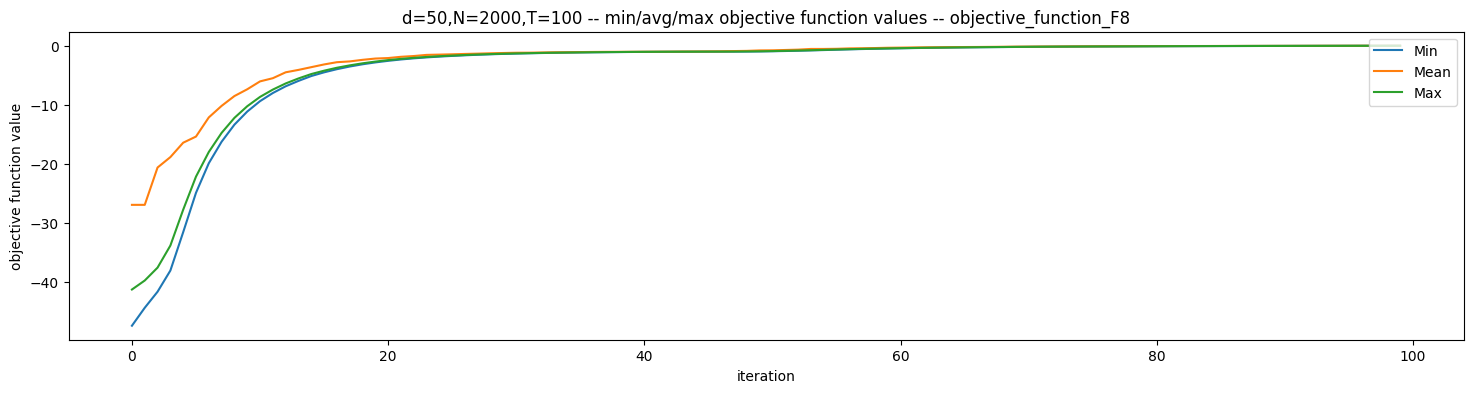

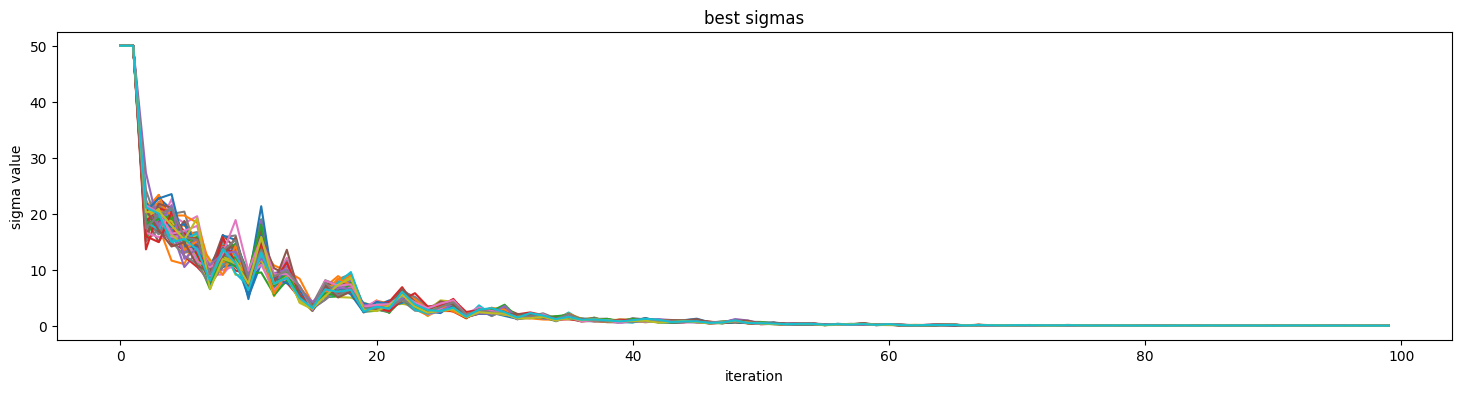

Iteration 0000 : best score = -62.54328932, mean score = -83.23503646.
Iteration 0020 : best score = -10.12560507, mean score = -11.80787084.
Iteration 0040 : best score = -2.88019024, mean score = -3.23845256.
Iteration 0060 : best score = -1.44512445, mean score = -1.52246424.
Iteration 0080 : best score = -1.10768421, mean score = -1.12569195.


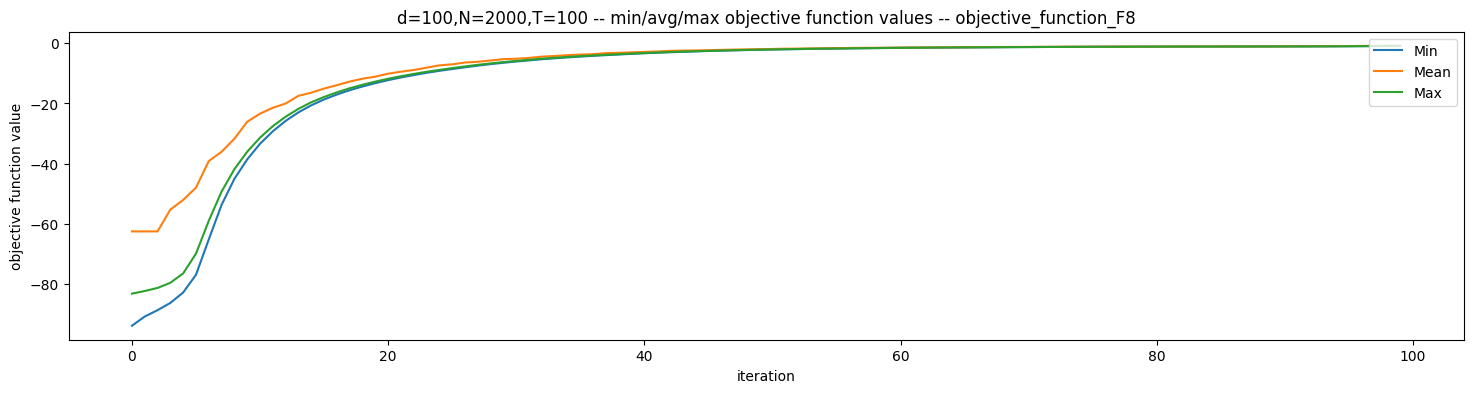

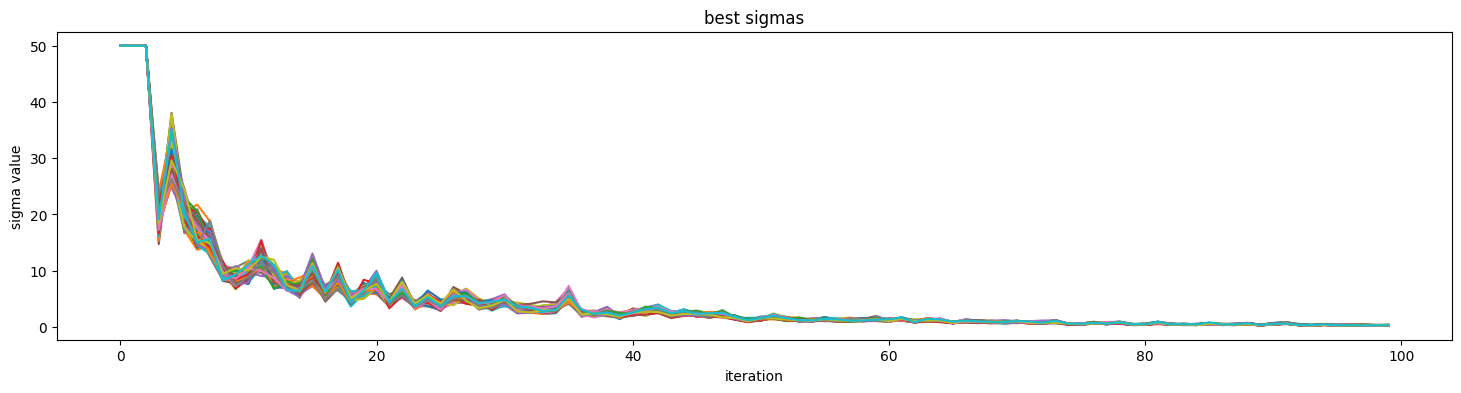

In [31]:
# Griewank function
plot_es(d=10,N=2000, T=100, log_every=20, objective_function=objective_function_F8)
plot_es(d=20,N=2000, T=100, log_every=20 ,objective_function=objective_function_F8)
plot_es(d=50,N=2000, T=100, log_every=20 ,objective_function=objective_function_F8)
plot_es(d=100,N=2000, T=100, log_every=20 ,objective_function=objective_function_F8)